In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
import re
import warnings

In [171]:
df = pd.read_csv("/content/customer_shopping_data.csv")
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [173]:
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [174]:
df.duplicated().sum()

0

Этот набор данных не содержит дубликатов и значений NaN

In [175]:
df.drop(columns=['invoice_no'], inplace= True)

In [176]:
df.set_index('customer_id', inplace=True)

In [177]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')
df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month

In [178]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99457 entries, C241288 to C273973
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   gender          99457 non-null  object        
 1   age             99457 non-null  int64         
 2   category        99457 non-null  object        
 3   quantity        99457 non-null  int64         
 4   price           99457 non-null  float64       
 5   payment_method  99457 non-null  object        
 6   invoice_date    99457 non-null  datetime64[ns]
 7   shopping_mall   99457 non-null  object        
 8   year            99457 non-null  int32         
 9   month           99457 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(4)
memory usage: 7.6+ MB


#Анализ и визуализация

In [179]:
gender_count = df['gender'].value_counts()
gender_count

gender
Female    59482
Male      39975
Name: count, dtype: int64

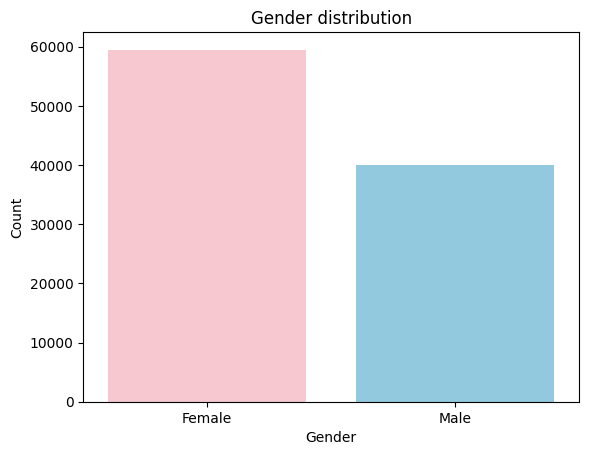

In [180]:
sns.countplot(x='gender', data = df,palette=['pink','skyblue'])
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [181]:
iplot(px.bar(gender_count,
             title='Gender distribution',
             text_auto=True,
             labels=dict(index='gender', value='count'),
             color_discrete_sequence=[['#FF69B4', '#87CEEB']]).update_xaxes(type='category'))

Как вы можете видеть, клиентов-женщин больше, чем клиентов-мужчин.

In [182]:
df.describe()

,age,quantity,price,invoice_date,year,month
count,99457.000000,99457.000000,99457.000000,99457,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424,2021.629408,6.113898
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,2021.000000,1.000000
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00,2021.000000,3.000000
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00,2022.000000,6.000000
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00,2022.000000,9.000000
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00,2023.000000,12.000000
std,14.990054,1.413025,941.184567,NaN,0.636136,3.569511


In [183]:
age_count = df['age'].value_counts().sort_index()
age_count

age
18    1844
19    1936
20    1844
21    1947
22    2051
23    1897
24    1977
25    1863
26    1896
27    1950
28    1953
29    1885
30    1981
31    1866
32    1891
33    1913
34    1883
35    1841
36    1954
37    2057
38    1954
39    1947
40    1960
41    1892
42    1892
43    2000
44    1904
45    1876
46    1911
47    1880
48    1955
49    1883
50    1873
51    1993
52    1945
53    1903
54    1830
55    1843
56    1916
57    1879
58    1875
59    1874
60    1874
61    1945
62    1909
63    1886
64    2002
65    1856
66    1876
67    1901
68    1893
69    1901
Name: count, dtype: int64

In [184]:
max_age = df.nlargest(1,'age')
max_age

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
customer_id,,,,,,,,,,
C159642,Male,69,Clothing,3,900.24,Credit Card,2021-11-04,Metrocity,2021,11


In [185]:
min_age = df.nsmallest(1,'age')
min_age

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
customer_id,,,,,,,,,,
C126436,Male,18,Cosmetics,3,121.98,Debit Card,2022-02-07,Zorlu Center,2022,2


In [186]:
gender_age = df.groupby('gender')['age'].mean().reset_index()
gender_age

,gender,age
0,Female,43.453515
1,Male,43.387767


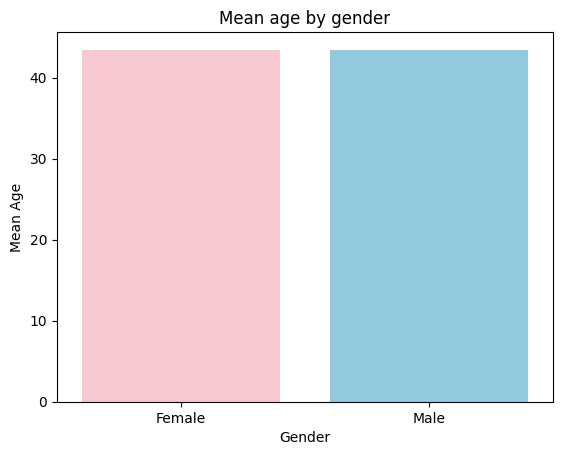

In [187]:
sns.barplot(x= 'gender', y = 'age', data = gender_age, palette=['pink','skyblue'])
plt.title('Mean age by gender')
plt.xlabel('Gender')
plt.ylabel('Mean Age')
plt.show()

In [188]:
iplot(px.bar(gender_age, x='gender', y='age', color='gender',
             color_discrete_sequence=['pink', 'skyblue'],
             labels={'gender': 'Gender', 'age': 'Mean Age'},
             title='Mean age by gender').update_xaxes(categoryorder='total ascending'))

In [189]:
category_count = df['category'].value_counts()
category_count

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

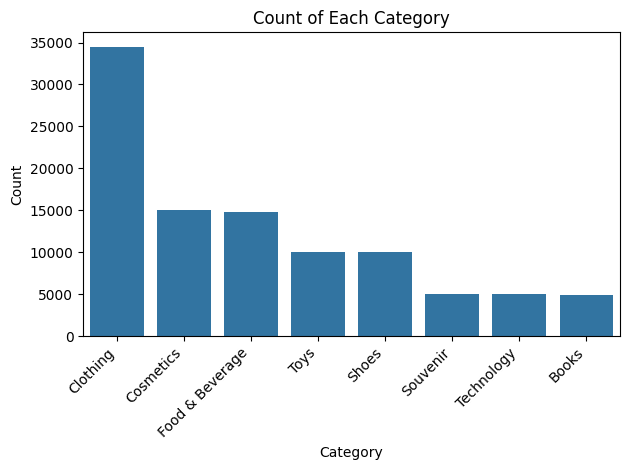

In [190]:
sns.barplot(x=category_count.index, y=category_count.values)
plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [191]:
iplot(px.bar(x=category_count.index, y=category_count.values,
             labels={'x': 'Category', 'y': 'Count'},
             title='Count of Each Category',
             color=category_count.index,
             color_discrete_sequence=px.colors.qualitative.Set3).update_layout(xaxis_tickangle=-45))

Одежда - это самая популярная категория, которую покупают клиенты

Text(0.5, 1.0, 'Category count for each gender')

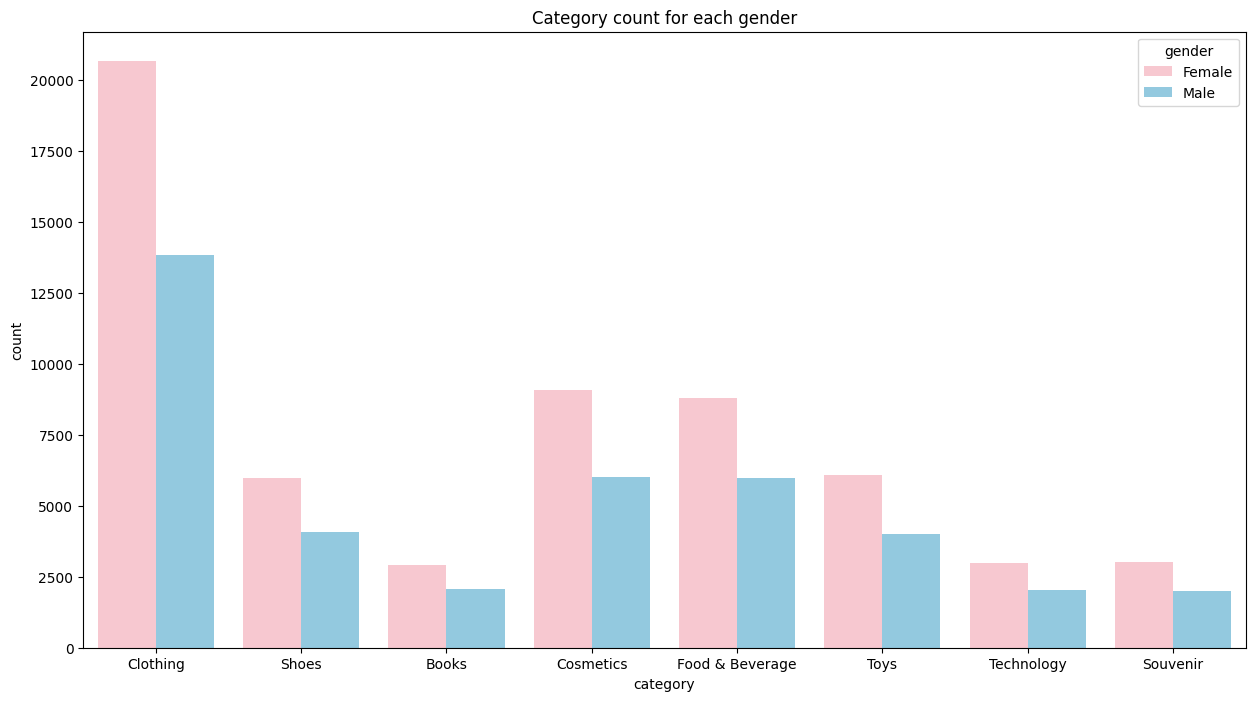

In [192]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x=df['category'], hue=df['gender'], palette=['pink','skyblue'])
plt.title('Category count for each gender')

In [193]:
gender_category_count = df.groupby(['gender', 'category']).size().reset_index(name= 'count')
iplot(px.bar(gender_category_count, x='category', y='count', color='gender',
             barmode='group', labels={'category': 'Category', 'count': 'Count'},
             title='Category Count for Each Gender',
             color_discrete_sequence=['pink','skyblue']))

мы можем заметить, что женщины покупают больше, чем мужчины, в каждой категории

In [194]:
df['quantity'].value_counts()

quantity
3    20149
5    19990
2    19828
1    19767
4    19723
Name: count, dtype: int64

In [195]:
gender_quantity_count = df.groupby(['gender', 'quantity']).size().reset_index(name= 'count')
iplot(px.bar(gender_quantity_count, x='quantity', y='count', color='gender',
             barmode='group', labels={'quantity': 'Quantity', 'count': 'Count'},
             title='Quantity Count for Each Gender',
             color_discrete_sequence=['pink','skyblue']))

In [196]:
df['price'].describe()

count    99457.000000
mean       689.256321
std        941.184567
min          5.230000
25%         45.450000
50%        203.300000
75%       1200.320000
max       5250.000000
Name: price, dtype: float64

In [197]:
df_max_price = pd.DataFrame([df.loc[df['price'].idxmax()]])
df_max_price

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
C313348,Male,44,Technology,5,5250.0,Cash,2021-10-26,Kanyon,2021,10


In [198]:
df_min_price = pd.DataFrame([df.loc[df['price'].idxmin()]])
df_min_price

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
C125696,Female,27,Food & Beverage,1,5.23,Cash,2021-05-01,Cevahir AVM,2021,5


In [199]:
df['price'].sum()

68551365.91

In [200]:
payment_method_count = df['payment_method'].value_counts()
payment_method_count

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [201]:
iplot(px.pie(names= payment_method_count.index, values= payment_method_count.values, title= 'Payment Method count'))

In [202]:
gender_payment_count = df.groupby(['gender', 'payment_method']).size().reset_index(name='count')

iplot(px.bar(gender_payment_count, x='payment_method', y='count', color='gender',
             barmode='group', title='Payment Method Distribution by Gender',
             color_discrete_sequence=['pink','skyblue']))

In [203]:
mall_count = df['shopping_mall'].value_counts()
mall_count

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

In [204]:
iplot(px.bar(x=mall_count.index, y=mall_count.values,
             labels={'x': 'Shopping Malls', 'y': 'Count'},
             title='Count of Shopping Malls',
             color=mall_count.index,
             color_discrete_sequence=px.colors.qualitative.Set3).update_layout(xaxis_tickangle=-45))

мы можем заметить, что mall of Istanbul и Kanyon - это самые популярные торговые центры, в которых люди покупают больше всего товаров.

In [205]:
year_count = df['year'].value_counts()
year_count

year
2022    45551
2021    45382
2023     8524
Name: count, dtype: int64

In [206]:
iplot(px.pie(names= year_count.index, values= year_count.values, title= 'Anual income'))

In [207]:
dataset = df.sample(frac=1, random_state=42)
dataset.reset_index(drop=True, inplace=True)
dataset.to_csv('data.csv', sep=",", index=False)

# Spark

In [208]:
!pip install pyspark

In [209]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import unix_timestamp
from pyspark.sql.functions import lit
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.sql.functions import count, when, isnull,col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [210]:
spark = SparkSession.builder.master("local").appName("practice").getOrCreate()
spark

## Считывание данных.

In [211]:
data = spark.read.format("csv").option("header", "true").option('inferSchema', 'true').load('/content/data.csv')
data

DataFrame[gender: string, age: int, category: string, quantity: int, price: double, payment_method: string, invoice_date: date, shopping_mall: string, year: int, month: int]

In [212]:
data.show(7)

+------+---+---------------+--------+-------+--------------+------------+----------------+----+-----+
|gender|age|       category|quantity|  price|payment_method|invoice_date|   shopping_mall|year|month|
+------+---+---------------+--------+-------+--------------+------------+----------------+----+-----+
|Female| 56|Food & Beverage|       4|  20.92|          Cash|  2021-05-14|          Kanyon|2021|    5|
|  Male| 22|Food & Beverage|       5|  26.15|          Cash|  2022-09-09|       Metrocity|2022|    9|
|Female| 53|Food & Beverage|       4|  20.92|    Debit Card|  2021-04-01|          Kanyon|2021|    4|
|Female| 65|Food & Beverage|       5|  26.15|   Credit Card|  2022-08-03|     Cevahir AVM|2022|    8|
|Female| 51|          Shoes|       4|2400.68|   Credit Card|  2021-04-15|    Metropol AVM|2021|    4|
|  Male| 62|           Toys|       5|  179.2|          Cash|  2022-11-19|     Cevahir AVM|2022|   11|
|Female| 20|       Clothing|       1| 300.08|    Debit Card|  2022-05-29|Mall of I

In [213]:
data.printSchema()

root
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- category: string (nullable = true)
 |-- quantity: integer (nullable = true)
 |-- price: double (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- invoice_date: date (nullable = true)
 |-- shopping_mall: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)



In [214]:
data.describe().show()

+-------+------+------------------+--------+------------------+-----------------+--------------+-------------+------------------+------------------+
|summary|gender|               age|category|          quantity|            price|payment_method|shopping_mall|              year|             month|
+-------+------+------------------+--------+------------------+-----------------+--------------+-------------+------------------+------------------+
|  count| 99457|             99457|   99457|             99457|            99457|         99457|        99457|             99457|             99457|
|   mean|  NULL| 43.42708909377922|    NULL| 3.003428617392441|689.2563209223468|          NULL|         NULL|2021.6294076837225| 6.113898468684959|
| stddev|  NULL|14.990053791852342|    NULL|1.4130251343054197|941.1845672154739|          NULL|         NULL|0.6361355835046866|3.5695112909930673|
|    min|Female|                18|   Books|                 1|             5.23|          Cash|  Cevahir 

## Предобработка данных в Spark.

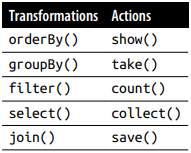

In [215]:
data = data.withColumn("invoice_date", (unix_timestamp("invoice_date", format='dd/MM/yyyy HH:mm') / 86400).cast(FloatType()))

for col in ['gender', 'category', 'payment_method', 'shopping_mall']:
    indexer = StringIndexer(inputCol=col, outputCol=f"{col}_index")
    data = indexer.fit(data).transform(data)
    data = data.drop(col)
    data = data.withColumnRenamed(f"{col}_index",col)
data.show(5)

+---+--------+-------+------------+----+-----+------+--------+--------------+-------------+
|age|quantity|  price|invoice_date|year|month|gender|category|payment_method|shopping_mall|
+---+--------+-------+------------+----+-----+------+--------+--------------+-------------+
| 56|       4|  20.92|     18761.0|2021|    5|   0.0|     2.0|           0.0|          1.0|
| 22|       5|  26.15|     19244.0|2022|    9|   1.0|     2.0|           0.0|          2.0|
| 53|       4|  20.92|     18718.0|2021|    4|   0.0|     2.0|           2.0|          1.0|
| 65|       5|  26.15|     19207.0|2022|    8|   0.0|     2.0|           1.0|          6.0|
| 51|       4|2400.68|     18732.0|2021|    4|   0.0|     4.0|           1.0|          3.0|
+---+--------+-------+------------+----+-----+------+--------+--------------+-------------+
only showing top 5 rows



In [216]:
one_hot_encoder = OneHotEncoder(inputCol='gender', outputCol='gender_one_hot')
one_hot_encoder = one_hot_encoder.fit(data)
data = one_hot_encoder.transform(data)
data = data.drop('gender')
data.show(5)

+---+--------+-------+------------+----+-----+--------+--------------+-------------+--------------+
|age|quantity|  price|invoice_date|year|month|category|payment_method|shopping_mall|gender_one_hot|
+---+--------+-------+------------+----+-----+--------+--------------+-------------+--------------+
| 56|       4|  20.92|     18761.0|2021|    5|     2.0|           0.0|          1.0| (1,[0],[1.0])|
| 22|       5|  26.15|     19244.0|2022|    9|     2.0|           0.0|          2.0|     (1,[],[])|
| 53|       4|  20.92|     18718.0|2021|    4|     2.0|           2.0|          1.0| (1,[0],[1.0])|
| 65|       5|  26.15|     19207.0|2022|    8|     2.0|           1.0|          6.0| (1,[0],[1.0])|
| 51|       4|2400.68|     18732.0|2021|    4|     4.0|           1.0|          3.0| (1,[0],[1.0])|
+---+--------+-------+------------+----+-----+--------+--------------+-------------+--------------+
only showing top 5 rows



In [217]:
assembler = VectorAssembler(inputCols=["age", "quantity", "price", "invoice_date", "year", "month", "category", "payment_method", "shopping_mall", "gender_one_hot"], outputCol="features")
data = assembler.transform(data)
data.show(5)


+---+--------+-------+------------+----+-----+--------+--------------+-------------+--------------+--------------------+
|age|quantity|  price|invoice_date|year|month|category|payment_method|shopping_mall|gender_one_hot|            features|
+---+--------+-------+------------+----+-----+--------+--------------+-------------+--------------+--------------------+
| 56|       4|  20.92|     18761.0|2021|    5|     2.0|           0.0|          1.0| (1,[0],[1.0])|[56.0,4.0,20.92,1...|
| 22|       5|  26.15|     19244.0|2022|    9|     2.0|           0.0|          2.0|     (1,[],[])|[22.0,5.0,26.15,1...|
| 53|       4|  20.92|     18718.0|2021|    4|     2.0|           2.0|          1.0| (1,[0],[1.0])|[53.0,4.0,20.92,1...|
| 65|       5|  26.15|     19207.0|2022|    8|     2.0|           1.0|          6.0| (1,[0],[1.0])|[65.0,5.0,26.15,1...|
| 51|       4|2400.68|     18732.0|2021|    4|     4.0|           1.0|          3.0| (1,[0],[1.0])|[51.0,4.0,2400.68...|
+---+--------+-------+----------

# Обучение модели

In [218]:
data_train, data_test = data.randomSplit([0.7, 0.3])

In [219]:
rf = RandomForestRegressor(featuresCol="features", labelCol="price")
model = rf.fit(data_train)

In [220]:
model

RandomForestRegressionModel: uid=RandomForestRegressor_2858dd4915c2, numTrees=20, numFeatures=10

In [227]:
predictions = model.transform(data_test)
evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
rmse = evaluator.evaluate(predictions)
print(f"Коэффициент детерминации (R2) в тестовых данных: {r2}")
print(f"Средняя абсолютная ошибка (MAE) в тестовых данных: {mae}")
print(f"Среднеквадратичная ошибка (RMSE) в тестовых данных: {rmse}")

Коэффициент детерминации (R2) в тестовых данных: 0.9973124753669647
Средняя абсолютная ошибка (MAE) в тестовых данных: 30.902273674932186
Среднеквадратичная ошибка (RMSE) в тестовых данных: 48.72668946269347
